<a href="https://colab.research.google.com/github/buriro-ezekia/FUTURE_DS_01/blob/main/Predict_Survival_on_the_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Understand the Problem**
- Objective: Predict survival on the Titanic based on passenger data.
- Key Output: A submission file with predictions (0 for not survived and 1 for survived).
- Evaluation Metric: Accuracy of predictions.

# 2. Load the Dataset

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')


In [3]:
# Display column names
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# 3. Exploratory Data Analysis (EDA)

In [5]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load the datasets (Assume the train and test datasets are available as 'train.csv' and 'test.csv')
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

# Step 1: Check the structure of the data
print("Train dataset structure:")
print(train.info())
print("\nTest dataset structure:")
print(test.info())

Train dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  


In [16]:
# Step 2: Summary statistics of the datasets
print("\nSummary of train dataset:")
print(train.describe(include='all'))
print("\nSummary of test dataset:")
print(test.describe(include='all'))


Summary of train dataset:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp      

In [19]:
# Step 3: Check for missing values
print("\nMissing values in train dataset:")
print(train.isnull().sum())
print("\nMissing values in test dataset:")
print(test.isnull().sum())


Missing values in train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in test dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


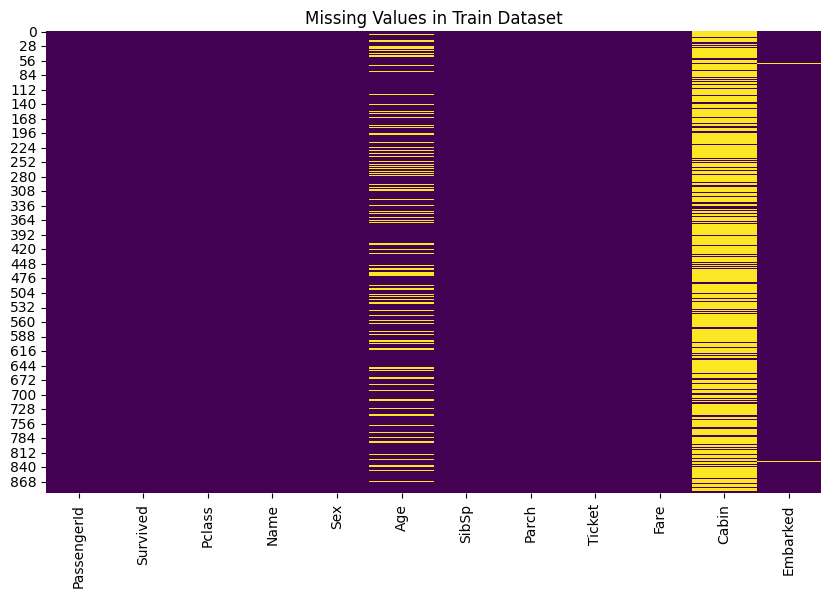

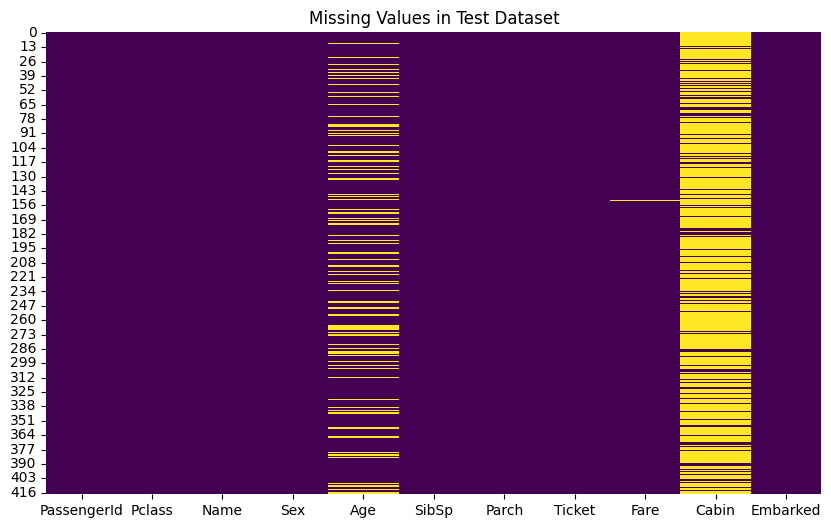

In [20]:
# Step 4: Visualise missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Train Dataset')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(test.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Test Dataset')
plt.show()


In [21]:
# Step 5: Handle missing values
# Fill missing Age values with the median age grouped by Pclass and Sex
def impute_age(dataset):
    # Use transform to align the index after filling NaNs
    dataset['Age'] = dataset.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
    return dataset

train = impute_age(train)
test = impute_age(test)

# Fill missing Cabin values with 'Unknown'
train['Cabin'] = train['Cabin'].fillna('Unknown')
test['Cabin'] = test['Cabin'].fillna('Unknown')

# Fill missing Embarked values with the mode
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Fill missing Fare value in test dataset with the median fare
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [22]:
# Verify missing values are handled
print("\nMissing values after imputation in train dataset:")
print(train.isnull().sum())
print("\nMissing values after imputation in test dataset:")
print(test.isnull().sum())


Missing values after imputation in train dataset:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Missing values after imputation in test dataset:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


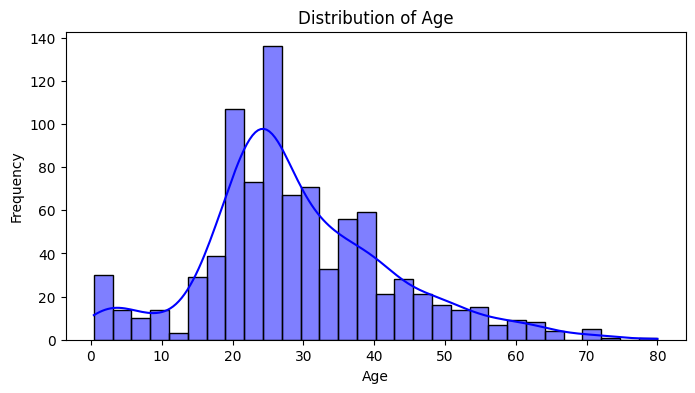

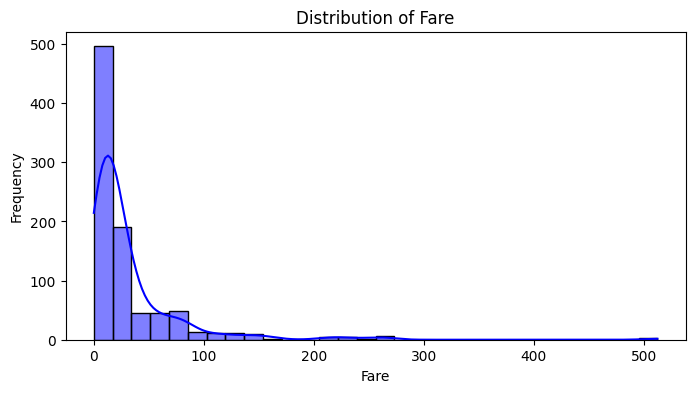

In [23]:
# Step 6: Check the distribution of numerical features
numerical_features = ['Age', 'Fare']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

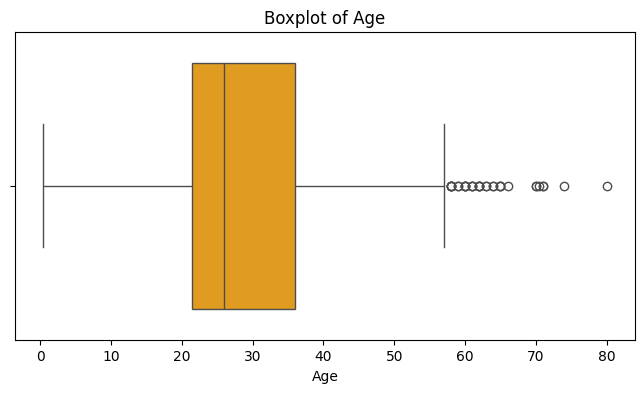

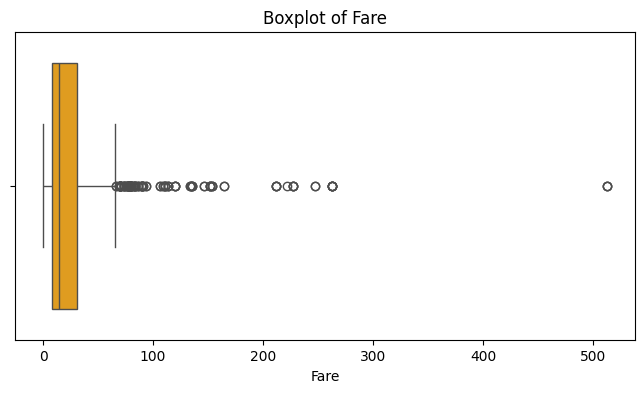

In [24]:
# Step 7: Check for outliers using boxplots
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train, x=feature, color='orange')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [45]:
# # Step 8: Analyse categorical features
# categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']
# for feature in categorical_features:
#     plt.figure(figsize=(6, 5))
#     sns.countplot(data=train, x=feature, hue=feature, palette='pastel', dodge=False, legend=False)
#     plt.title(f'Distribution of {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Count')
#     plt.show()


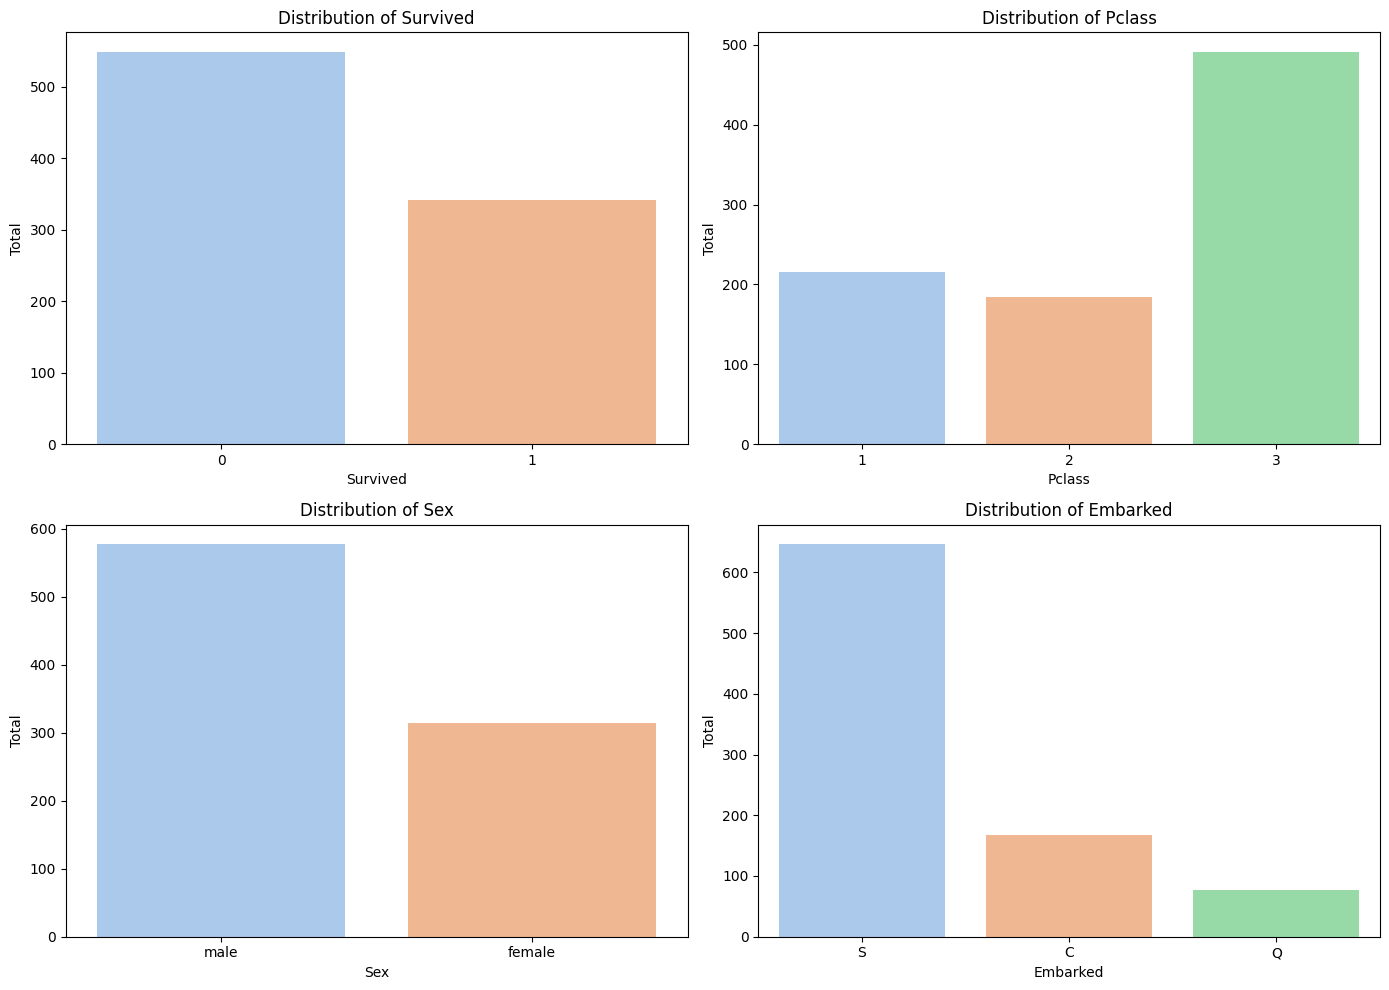

In [44]:
# Step 8: Analyse categorical features
# Using subplots

# List of categorical features to plot
categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and plot on the respective subplot
for i, feature in enumerate(categorical_features):
    sns.countplot(data=train, x=feature, hue=feature, palette='pastel', dodge=False, ax=axes[i], legend=False)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Total')

# Adjust layout to make it more readable
plt.tight_layout()
plt.show()


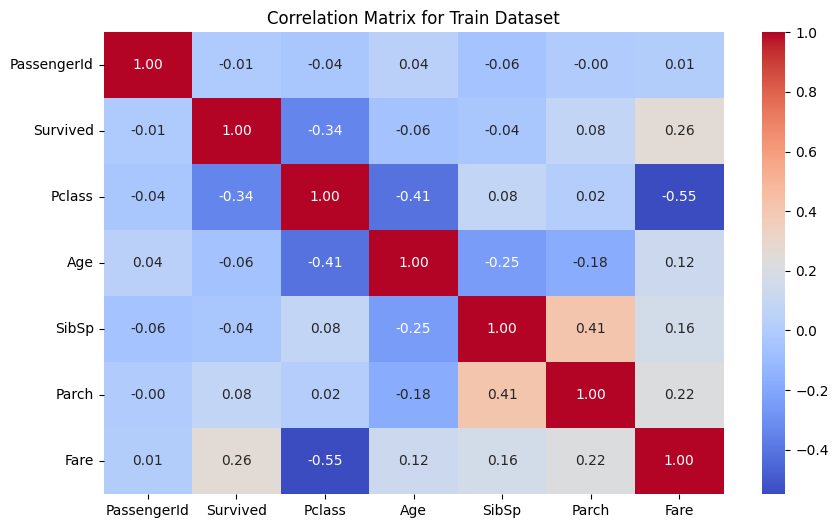

In [36]:
# Step 9: Analyse correlations between numerical features
plt.figure(figsize=(10, 6))
# Specify numeric_only=True to only consider numerical columns for correlation
corr_matrix = train.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Train Dataset')
plt.show()

In [46]:
# # Step 10: Examine relationships between features (e.g., Age vs Fare, Pclass vs Survived)
# # Scatter plot of Age vs Fare, coloured by Survived
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=train, x='Age', y='Fare', hue='Survived', palette='viridis')
# plt.title('Scatter Plot of Age vs Fare (Coloured by Survived)')
# plt.xlabel('Age')
# plt.ylabel('Fare')
# plt.show()

# # Bar plot of Survival Rate by Passenger Class without specifying palette
# plt.figure(figsize=(10, 6))
# sns.barplot(data=train, x='Pclass', y='Survived', errorbar=None)
# plt.title('Survival Rate by Passenger Class')
# plt.xlabel('Pclass')
# plt.ylabel('Survival Rate')
# plt.show()


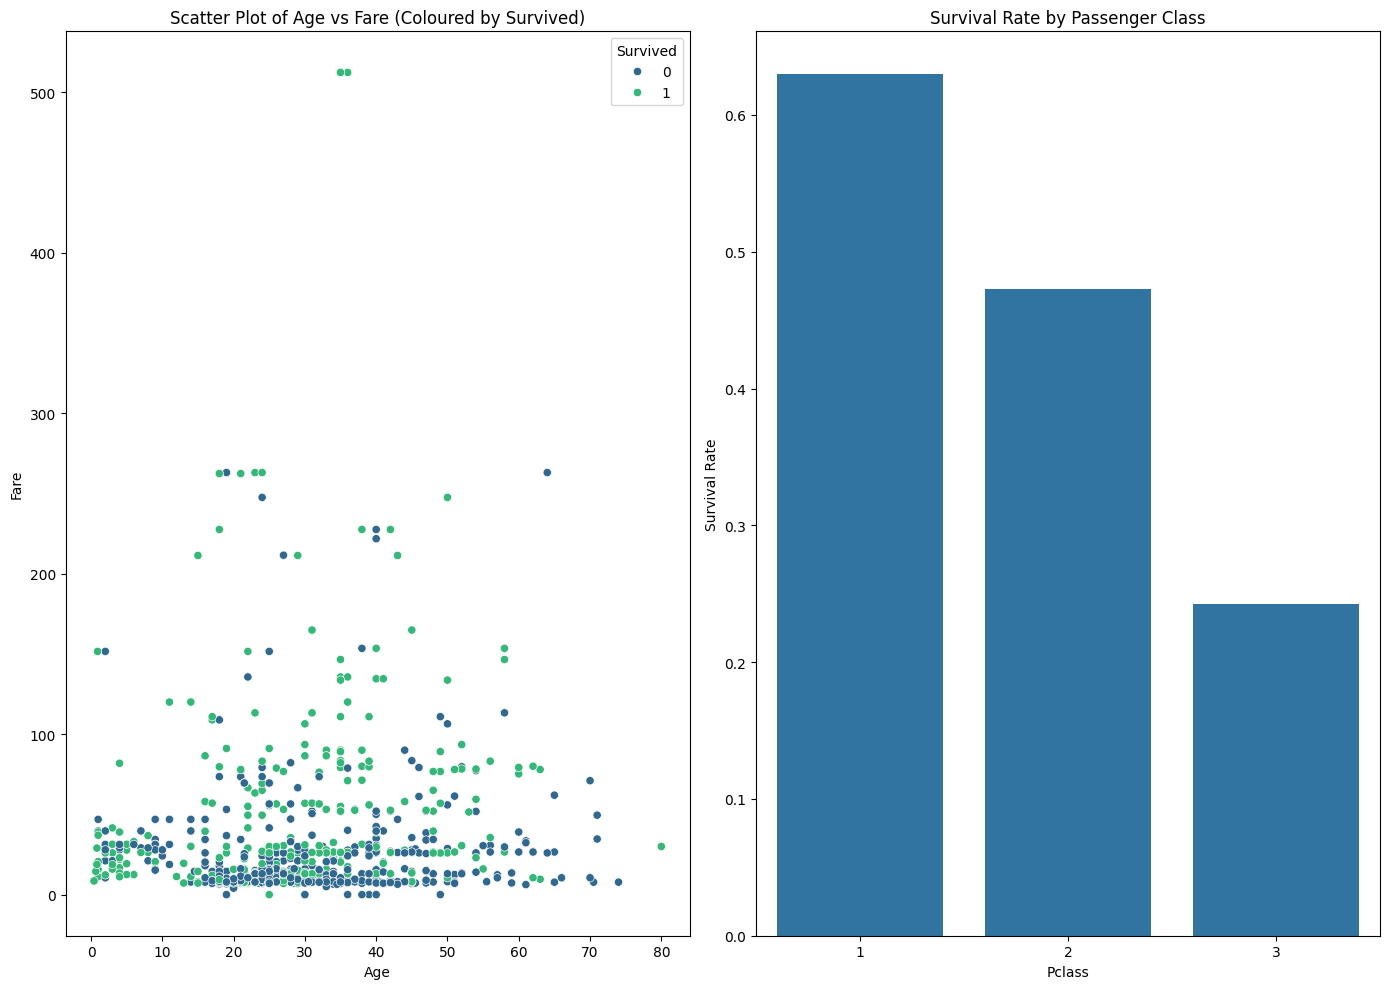

In [48]:
# Step 10: Examine relationships between features (e.g., Age vs Fare, Pclass vs Survived)
# Scatter plot of Age vs Fare, coloured by Survived

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

# Scatter plot of Age vs Fare, coloured by Survived
sns.scatterplot(data=train, x='Age', y='Fare', hue='Survived', palette='viridis', ax=axes[0])
axes[0].set_title('Scatter Plot of Age vs Fare (Coloured by Survived)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Fare')

# Bar plot of Survival Rate by Passenger Class
sns.barplot(data=train, x='Pclass', y='Survived', errorbar=None, ax=axes[1])
axes[1].set_title('Survival Rate by Passenger Class')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Survival Rate')

# Adjust layout to make it more readable
plt.tight_layout()
plt.show()


# 4. Feature Engineering

In [50]:
# Step 1: Prepare the data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is your training dataset and 'Survived' is your target variable
X = train.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])  # Drop non-informative columns
y = train['Survived']

# Step 2: Handle missing values (e.g., using median for numerical features and mode for categorical ones)
X['Age'].fillna(X['Age'].median())
X['Embarked'].fillna(X['Embarked'].mode()[0])
X['Fare'].fillna(X['Fare'].median())

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
# Step 4: Fit a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
# Select the top features based on importance
selected_features = feature_importances[feature_importances > 0.05].index  # Example threshold: 0.05

print("\nSelected Features Based on Importance:\n", selected_features)
print("Feature Importances:")
print(feature_importances)


Selected Features Based on Importance:
 Index(['Sex_male', 'Fare', 'PassengerId', 'Age', 'Pclass_3'], dtype='object')
Feature Importances:
Sex_male       0.262243
Fare           0.246867
PassengerId    0.222456
Age            0.192126
Pclass_3       0.076308
dtype: float64


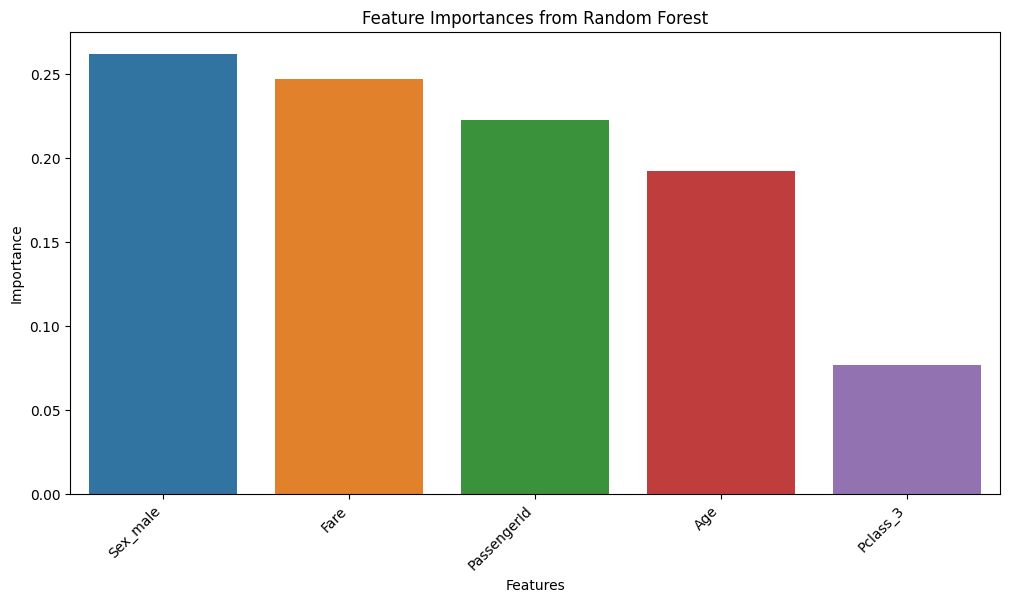

In [76]:
# Step 6: Visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.index, y=feature_importances.values, hue=feature_importances.index, errorbar=None)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# 5. Split the Data

In [77]:
# Step 1: Select the features and target variable for training
selected_features = ['Sex_male', 'Fare', 'PassengerId', 'Age', 'Pclass_3']
# Instead of using the original 'train' DataFrame, use the DataFrame 'X' which contains the one-hot encoded columns
X = X[selected_features]  # Features
y = train['Survived']  # Target

# Step 2: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print("Training set features shape:", X_train.shape)
print("Validation set features shape:", X_val.shape)
print("Training set target shape:", y_train.shape)
print("Validation set target shape:", y_val.shape)

Training set features shape: (712, 5)
Validation set features shape: (179, 5)
Training set target shape: (712,)
Validation set target shape: (179,)


# 6. Train a Machine Learning Model

In [68]:
# # ML Model
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Step 1: Choose and initialize the model
# model = RandomForestClassifier(random_state=42)

# # Step 2: Train the model on the training data
# model.fit(X_train, y_train)

# # Step 3: Make predictions on the validation set
# y_pred = model.predict(X_val)

# # Step 4: Evaluate the model's performance
# accuracy = accuracy_score(y_val, y_pred)
# conf_matrix = confusion_matrix(y_val, y_pred)
# class_report = classification_report(y_val, y_pred)


In [69]:
# # Display the results
# print(f'Accuracy: {accuracy:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix)
# print('Classification Report:')
# print(class_report)

In [78]:
# Three ML  for comparison
#  Logistic Regression, Random Forest, and Gradient Boosting
# Import necessary libraries for all models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train each model, make predictions, and evaluate performance
for name, model in models.items():
    # Step 1: Train the model
    model.fit(X_train, y_train)

    # Step 2: Make predictions on the validation set
    y_pred = model.predict(X_val)

    # Step 3: Evaluate the model's performance
    accuracy = accuracy_score(y_val, y_pred)
    conf_matrix = confusion_matrix(y_val, y_pred)
    class_report = classification_report(y_val, y_pred)

    # Display results
    print(f'{name} Model:')
    print(f'Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)
    print('-' * 60)


Logistic Regression Model:
Accuracy: 0.79
Confusion Matrix:
[[90 15]
 [22 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

------------------------------------------------------------
Random Forest Model:
Accuracy: 0.82
Confusion Matrix:
[[95 10]
 [23 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

------------------------------------------------------------
Gradient Boosting Model:
A

# 7. Test the Model

In [79]:
# Step 1: Preprocess the test dataset using the same transformations as the training data
# Apply one-hot encoding to the 'Sex' and 'Pclass' columns in the test data
X_test = pd.get_dummies(test, columns=['Sex', 'Pclass'], drop_first=True)

# Ensure 'PassengerId' is included as a feature in X_test
X_test['PassengerId'] = X_test['PassengerId']

# Fill missing values in 'Age' and 'Fare' columns with median
X_test['Age'].fillna(X_test['Age'].median())
X_test['Fare'].fillna(X_test['Fare'].median())

# Ensure that the columns in X_test match the selected features for training
X_test = X_test[selected_features]

# Step 2: Make predictions using the trained models on the test dataset
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)


In [71]:
# Step 3: Display predictions for each model
for name, prediction in predictions.items():
    print(f'Predictions by {name}:')
    print(prediction[:10])  # Display the first 10 predictions
    print('-' * 60)


Predictions by Logistic Regression:
[0 0 0 0 1 0 1 0 1 0]
------------------------------------------------------------
Predictions by Random Forest:
[0 1 0 0 0 0 1 0 1 0]
------------------------------------------------------------
Predictions by Gradient Boosting:
[0 0 0 0 0 0 0 0 1 0]
------------------------------------------------------------


# 8. Create Submission File

In [73]:
# # Save the predictions to a CSV file for submission or further analysis
# predictions_df = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions['Random Forest']})
# predictions_df.to_csv('submission.csv', index=False)

In [80]:
# Save predictions from a chosen model (e.g., 'Logistic Regression', 'Random Forest', 'Gradient Boosting')
model_to_save = 'Gradient Boosting'  # Change this to the model you wish to use (e.g., 'Logistic Regression', 'Gradient Boosting')

# Ensure the chosen model exists in the dictionary
if model_to_save in predictions:
    predictions_df = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions[model_to_save]})
    predictions_df.to_csv('Predict survival_submission.csv', index=False)
    print(f'Predictions saved to submission.csv for {model_to_save}')
else:
    print(f'Model "{model_to_save}" is not available in the predictions dictionary.')


Predictions saved to submission.csv for Gradient Boosting


In [82]:
# # Ensure that the 'test' DataFrame has 418 rows
# print(f"Number of rows in the test DataFrame: {len(test)}")  # Should print 418

# # Reset the index before creating the DataFrame for submission
# predictions_df = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions['Random Forest']}).reset_index(drop=True)

# # Save to CSV with 418 rows
# predictions_df.to_csv('submission.csv', index=False)
# print('Submission saved to submission.csv with 418 rows.')
